In [520]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
from wordcloud import WordCloud
import datetime 

In [391]:
stockx=pd.read_csv('stockxv2.csv')

In [392]:
stockx['avg_ROI']=stockx['avg_sales_price']/stockx['retail_price']
stockx['year_price_spread']=stockx['year_high']-stockx['year_low']
stockx['bid_ask_spread']=stockx['highest_bid']-stockx['lowest_ask']
stockx['est_annual_sales']=stockx['annual_sales_quant']*stockx['avg_sales_price']
stockx['stockx_commission']=stockx['est_annual_sales']*0.095
stockx['stockx_commission_per_sale']=stockx['avg_sales_price']*0.095
stockx['seller_net_profit_per_sale']=(stockx['avg_sales_price']-stockx['retail_price'])*(1-0.095-0.03)
stockx['seller_net_profit']=stockx['annual_sales_quant']*stockx['seller_net_profit_per_sale']

In [393]:
df=stockx

In [422]:
df.head(10)

,annual_sales_quant,avg_sales_price,category,color,condition,description,highest_bid,lowest_ask,product_title,release_date,...,avg_ROI,year_price_spread,bid_ask_spread,est_annual_sales,stockx_commission,stockx_commission_per_sale,seller_net_profit_per_sale,seller_net_profit,release_date_mut,release_year
0,NaN,NaN,streetwear,NaN,New,NaN,65.0,250.0,BAPE ABC Camo Japanese Socks Green,9/30/19 0:00,...,NaN,NaN,-185.0,NaN,NaN,NaN,NaN,NaN,19,19
1,128.0,59.0,streetwear,NaN,New,Released as a part of Supreme's Fall/ Winter 2...,56.0,55.0,Supreme Banner Tee Magenta,8/22/19 0:00,...,1.552632,60.0,1.0,7552.0,717.440,5.605,18.375,2352.000,19,19
2,128.0,58.0,streetwear,NaN,New,Released as a part of Supreme's Fall/Winter 20...,61.0,62.0,Supreme Faces L/S Tee Black,8/22/19 0:00,...,1.450000,50.0,-1.0,7424.0,705.280,5.510,15.750,2016.000,19,19
3,385.0,29.0,streetwear,NaN,New,NaN,24.0,26.0,Supreme Hanes Socks (4 Pack) Red,8/22/19 0:00,...,1.450000,20.0,-2.0,11165.0,1060.675,2.755,7.875,3031.875,19,19
4,428.0,230.0,streetwear,NaN,New,Supreme's first major brand collaboration of F...,245.0,205.0,Supreme LACOSTE Logo Panel Hooded Sweatshirt Navy,9/26/19 0:00,...,1.455696,175.0,40.0,98440.0,9351.800,21.850,63.000,26964.000,19,19
5,466.0,76.0,streetwear,NaN,New,NaN,50.0,45.0,Virgil Abloh MCA Figures of Speech Lines Tee W...,NaN,...,1.134328,87.0,5.0,35416.0,3364.520,7.220,7.875,3669.750,NaN,NaN
6,77.0,146.0,streetwear,NaN,New,NaN,120.0,119.0,Virgil Abloh x MCA Hyperbole Hoodie Black,9/17/19 0:00,...,1.489796,255.0,1.0,11242.0,1067.990,13.870,42.000,3234.000,19,19
7,1.0,70.0,streetwear,NaN,New,NaN,50.0,85.0,FEAR OF GOD ESSENTIALS Sweat Shorts Black Ink,9/6/19 0:00,...,1.000000,0.0,-35.0,70.0,6.650,6.650,0.000,0.000,19,19
8,NaN,NaN,streetwear,NaN,New,NaN,50.0,5000.0,Kanye West Jesus Is King Painting (Yeezy Promo...,9/28/19 0:00,...,NaN,NaN,-4950.0,NaN,NaN,NaN,NaN,NaN,19,19
9,7140.0,32.0,streetwear,NaN,New,NaN,25.0,25.0,KAWS x Uniqlo Flayed Tee (US Sizing) White,6/3/19 0:00,...,2.133333,95.0,0.0,228480.0,21705.600,3.040,14.875,106207.500,19,19


In [385]:
import re

In [415]:
#df['release_year']=df['release_date'].replace(np.NaN,0).str.extract('(1. )')

In [337]:
df['release_date']=df['release_date'].replace(np.NaN,0)

In [457]:
df['release_date']=pd.to_datetime(df['release_date'])

In [743]:
sneakers=df.loc[df.category=='sneakers']

In [747]:
#lower case product title column
sneakers['product_title_lower']=list(map(lambda x:x.lower(),list(sneakers.product_title)))

/Users/zhuwang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [967]:
#brand key words from product col 
lst=[]
for i in range(0 ,len(sneakers.product_title_lower)):
    new=re.findall('jordan|air max|nike|adidas|yeezy|lebron|asics|converse|new balance|vans',\
                   list(sneakers.product_title_lower)[i])
    new=' '.join(map(str,new))
    if new=='': 
        lst.append('other')
    else:
        lst.append(new)
        
#'air|jordan|nike|yeezy|adidas|lebron|asics|balenciaga|chanel|converse|diadora|dior|\
#gucci|li-ning|louis vuitton|new balance|prada|puma|reebok|saucony|under armour|vans',\

In [954]:
#add brand column to sneakers 
sneakers['brand']=lst

/Users/zhuwang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [523]:
streetwear=df.loc[df.category=='streetwear']

In [524]:
collectibles=df.loc[df.category=='collectibles']

In [525]:
handbags=df.loc[df.category=='handbags']

In [239]:
print((sneakers['condition'].value_counts()/sneakers['condition'].count())*100)
print('*'*50)
print((streetwear['condition'].value_counts()/streetwear['condition'].count())*100)
print('*'*50)
print((collectibles['condition'].value_counts()/collectibles['condition'].count())*100)
print('*'*50)
print((handbags['condition'].value_counts()/handbags['condition'].count())*100)

New    100.0
Name: condition, dtype: float64
**************************************************
New    100.0
Name: condition, dtype: float64
**************************************************
New       96.743697
Graded     3.256303
Name: condition, dtype: float64
**************************************************
Pre-Owned: Excellent    100.0
Name: condition, dtype: float64


In [240]:
wc = WordCloud(background_color="white", max_words=100, width=1000, height=600,colormap = "winter",scale = 2.0)
# generate word cloud
wc.generate(' '.join(df['product_title']))

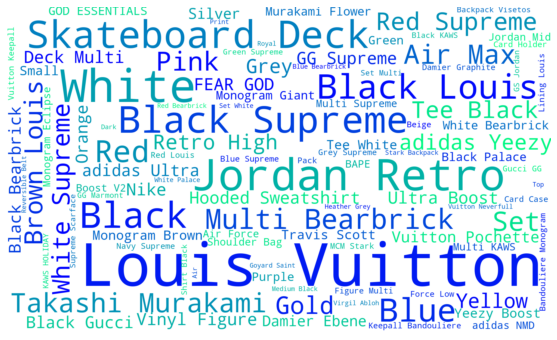

In [111]:
plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [101]:
test=stockx.groupby('category').agg('sum')[['est_annual_sales','stockx_commission','seller_net_profit']].rename(columns={'est_annual_sales':'estimated annual sales',
                                                                                                                         'stockx_commission':'stockx commission',
                                                                                                                         'seller_net_profit':'sellers net profit'})

In [241]:
def color_negative_red(value):
    if value < 0:
        color = 'red'
    else:
        color = 'black'
    return 'color: %s' % color
##8abbeb

In [242]:
test

,estimated annual sales,stockx commission,sellers net profit
category,,,
collectibles,1.137561e+07,1.080683e+06,3.348483e+06
handbags,1.344160e+07,1.276952e+06,-1.222672e+05
sneakers,6.801154e+08,6.461096e+07,2.252474e+08
streetwear,4.654855e+07,4.422112e+06,1.679503e+07
total,1.502962e+09,1.427814e+08,4.905373e+08


In [243]:
th_props = [
  ('font-size', '11px'),
  ('text-align', 'center'),
  ('font-weight', 'bold'),
  ('color', '#8abbeb'),
  ('background-color', '#064e91')
  ]

# Set CSS properties for td elements in dataframe
td_props = [
  ('font-size', '11px')
  ]

# Set table styles
styles = [
  dict(selector="th", props=th_props),
  dict(selector="td", props=td_props)
  ]

In [106]:
test.loc['total'] = test.sum()

In [244]:
test.style.applymap(color_negative_red).format('${0:,.0f}').set_table_styles([{'selector': 'tr:nth-of-type(odd)',
  'props': [('background', '#eee')]}, 
 {'selector': 'tr:nth-of-type(even)',
  'props': [('background', 'white')]},
 {'selector': 'th',
  'props': [('background', '#245ab3'), 
            ('color', 'white'),
            ('font-family', 'verdana')]},
 {'selector': 'td',
  'props': [('font-family', 'verdana')]},
])

,estimated annual sales,stockx commission,sellers net profit
category,,,
collectibles,"$11,375,613","$1,080,683","$3,348,483"
handbags,"$13,441,601","$1,276,952","$-122,267"
sneakers,"$680,115,389","$64,610,962","$225,247,412"
streetwear,"$46,548,547","$4,422,112","$16,795,026"
total,"$1,502,962,300","$142,781,418","$490,537,310"


In [76]:
test.style.format('${0:,.0f}')

,est_annual_sales,stockx_commission,seller_net_profit
category,,,
collectibles,"$11,375,613","$1,080,683","$3,348,483"
handbags,"$13,441,601","$1,276,952","$-122,267"
sneakers,"$680,115,389","$64,610,962","$225,247,412"
streetwear,"$46,548,547","$4,422,112","$16,795,026"
total,"$751,481,150","$71,390,709","$245,268,655"


In [619]:
test2=df.groupby('category').agg('sum')[['est_annual_sales','stockx_commission','seller_net_profit']].rename(columns={'est_annual_sales':'estimated annual sales',
                                                                                                                         'stockx_commission':'stockx commission',
                                                                                                                         'seller_net_profit':'sellers net profit'})
test2['estimated annual sales %']=test2['estimated annual sales']/(test2['estimated annual sales'].sum())*100
test2['stockx commission %']=test2['stockx commission']/(test2['stockx commission'].sum())*100

In [620]:
test2

,estimated annual sales,stockx commission,sellers net profit,estimated annual sales %,stockx commission %
category,,,,,
collectibles,11375613.0,1.080683e+06,3.348483e+06,1.513759,1.513759
handbags,13441601.0,1.276952e+06,-1.222672e+05,1.788681,1.788681
sneakers,680115389.0,6.461096e+07,2.252474e+08,90.503320,90.503320
streetwear,46548547.0,4.422112e+06,1.677901e+07,6.194240,6.194240


In [628]:
test3=df.groupby('category').agg('sum')[['annual_sales_quant']]
test3['annual_sales_quant %']=test3['annual_sales_quant']/(test3['annual_sales_quant'].sum())*100

In [1170]:
colFun = {'annual_sales_quant':['count'],
          'avg_sales_price': ['mean','std'], 
          'retail_price': ['mean','std'],
          'avg_ROI':['mean','std'],
          'seller_net_profit_per_sale':['mean','std'],
          }

test7=df.groupby('category').agg(colFun).rename(columns={'annual_sales_quant':'sales volume',
                                                         'avg_sales_price':'avg sales price ($)',
                                                         'retail_price':'retail price ($)',
                                                         'avg_ROI':'avg ROI',
                                                        'seller_net_profit_per_sale':'seller net profit ($)'})
test7.style.applymap(color_negative_red).format('{0:,.2f}').set_table_styles([{'selector': 'tr:nth-of-type(odd)',
  'props': [('background', '#eee')]}, 
 {'selector': 'tr:nth-of-type(even)',
  'props': [('background', 'white')]},
 {'selector': 'th',
  'props': [('background', '#245ab3'), 
            ('color', 'white'),
            ('font-family', 'verdana')]},
 {'selector': 'td',
  'props': [('font-family', 'verdana')]},
])

In [629]:
test3

,annual_sales_quant,annual_sales_quant %
category,,
collectibles,40970.0,1.560522
handbags,13427.0,0.511426
sneakers,2280829.0,86.875386
streetwear,290177.0,11.052665


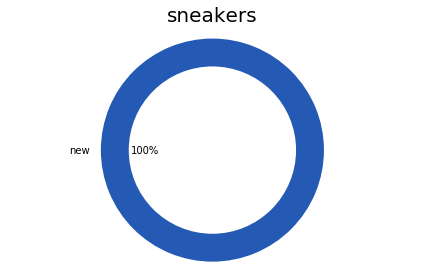

In [222]:
import matplotlib.pyplot as plt
# Pie chart
labels = ['new']
sizes = [100]
#colors
colors = ['#245ab3']#'#ff9999','#66b3ff','#99ff99','#ffcc99
 
fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors = colors, labels=labels, autopct='%1.0f%%', startangle=0)
#draw circle
centre_circle = plt.Circle((0,0),0.75,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.title('sneakers', fontsize=20)
plt.tight_layout()
plt.show()

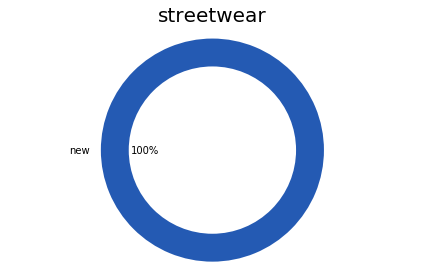

In [165]:
import matplotlib.pyplot as plt
# Pie chart
labels = ['new']
sizes = [100]
#colors
colors = ['#245ab3']#'#ff9999','#66b3ff','#99ff99','#ffcc99
 
fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors = colors, labels=labels, autopct='%1.0f%%', startangle=0)
#draw circle
centre_circle = plt.Circle((0,0),0.75,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.title('streetwear', fontsize=20)
plt.tight_layout()
plt.show()

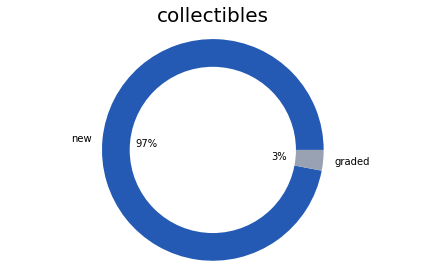

In [166]:
import matplotlib.pyplot as plt
# Pie chart
labels = ['new','graded']
sizes = [97,3]
#colors
colors = ['#245ab3','#98a2b3']#'#ff9999','#66b3ff','#99ff99','#ffcc99
 
fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors = colors, labels=labels, autopct='%1.0f%%', startangle=0)
#draw circle
centre_circle = plt.Circle((0,0),0.75,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.title('collectibles', fontsize=20)
plt.tight_layout()
plt.show()

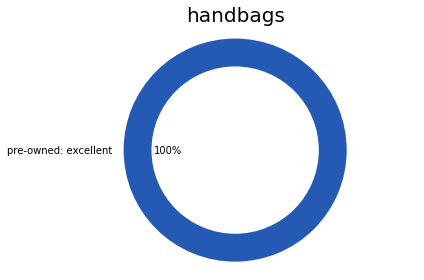

In [167]:
import matplotlib.pyplot as plt
# Pie chart
labels = ['pre-owned: excellent']
sizes = [100]
#colors
colors = ['#245ab3']#'#ff9999','#66b3ff','#99ff99','#ffcc99
 
fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors = colors, labels=labels, autopct='%1.0f%%', startangle=0)
#draw circle
centre_circle = plt.Circle((0,0),0.75,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.title('handbags', fontsize=20)
plt.tight_layout()
plt.show()

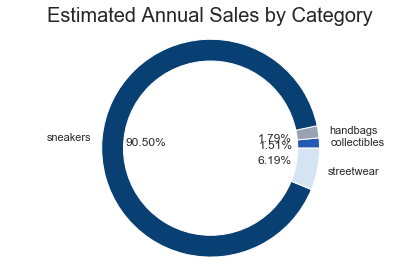

In [1160]:
import matplotlib.pyplot as plt
# Pie chart
labels = list(test2.index)
sizes = list(test2['estimated annual sales %'])
colors =['#245ab3','#98a2b3','#094073','#d5e4f2']
#colors = cmap[Blues] #'#ff9999','#66b3ff','#99ff99','#ffcc99
 
fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors=colors, labels=labels, autopct='%1.2f%%', startangle=0)
#draw circle
centre_circle = plt.Circle((0,0),0.80,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.title('Estimated Annual Sales by Category', fontsize=20)
plt.tight_layout()
plt.show()

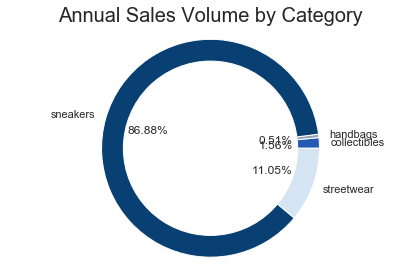

In [980]:
import matplotlib.pyplot as plt
# Pie chart
labels = list(test3.index)
sizes = list(test3['annual_sales_quant %'])
colors =['#245ab3','#98a2b3','#094073','#d5e4f2']
#colors = cmap[Blues] #'#ff9999','#66b3ff','#99ff99','#ffcc99
 
fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors=colors, labels=labels, autopct='%1.2f%%', startangle=0)
#draw circle
centre_circle = plt.Circle((0,0),0.8,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.title('Annual Sales Volume by Category', fontsize=20)
plt.tight_layout()
plt.show()

Text(0, 0.5, 'Product Title')

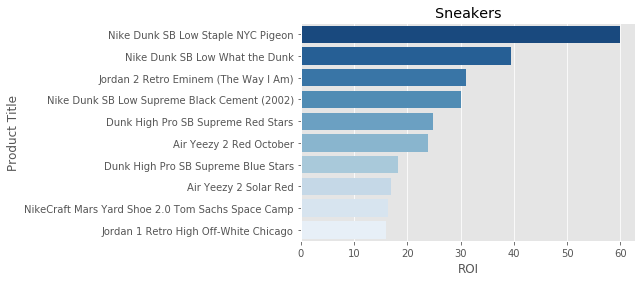

In [224]:
bar_sneakers = sns.barplot(y="product_title", x="avg_ROI", data=sneakers.sort_values('avg_ROI',ascending=False).head(10),palette="Blues_r")
bar_sneakers.set_title('Sneakers')
bar_sneakers.set_xlabel('ROI')
bar_sneakers.set_ylabel('Product Title')


Text(0, 0.5, 'Product Title')

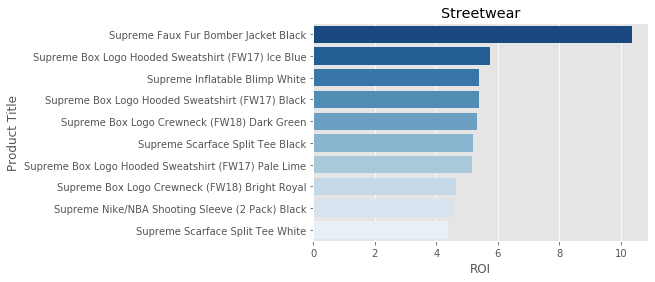

In [245]:
#top 10 streetwear ROI
bar_sneakers = sns.barplot(y="product_title", x="avg_ROI", data=streetwear.sort_values('avg_ROI',ascending=False).head(10),palette="Blues_r")
bar_sneakers.set_title('Streetwear')
bar_sneakers.set_xlabel('ROI')
bar_sneakers.set_ylabel('Product Title')


Text(0, 0.5, 'Product Title')

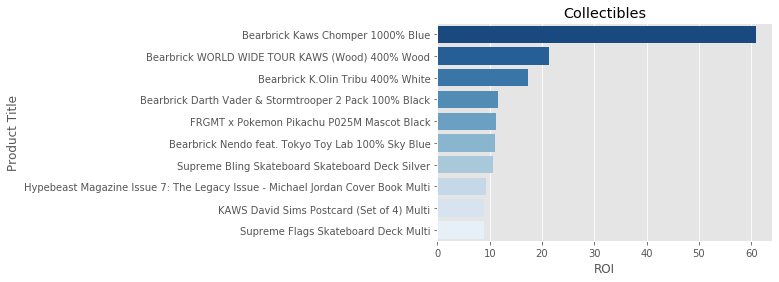

In [227]:
#top 10 collectible ROI
bar_sneakers = sns.barplot(y="product_title", x="avg_ROI", data=collectibles.sort_values('avg_ROI',ascending=False).head(10),palette="Blues_r")
bar_sneakers.set_title('Collectibles')
bar_sneakers.set_xlabel('ROI')
bar_sneakers.set_ylabel('Product Title')


Text(0, 0.5, 'Product Title')

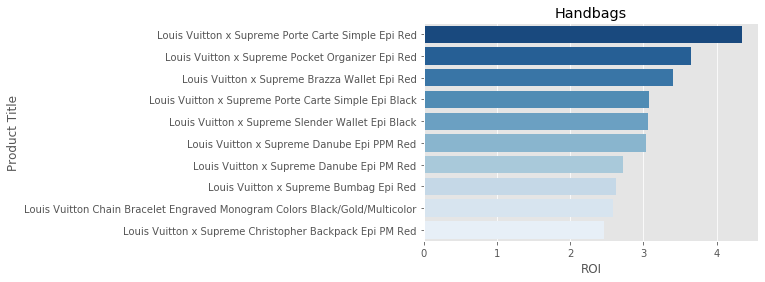

In [228]:
#top 10 hangbags ROI
bar_sneakers = sns.barplot(y="product_title", x="avg_ROI", data=handbags.sort_values('avg_ROI',ascending=False).head(10),palette="Blues_r")
bar_sneakers.set_title('Handbags')
bar_sneakers.set_xlabel('ROI')
bar_sneakers.set_ylabel('Product Title')


In [637]:
#mean and std for retail price, avg sales price, avg ROI, and avg seller net profit per sale 
colFun = {'annual_sales_quant':['count'],
          'avg_sales_price': ['mean','std'], 
          'retail_price': ['mean','std'],
          'avg_ROI':['mean','std'],
          'seller_net_profit_per_sale':['mean','std'],
          }

test4=stockx.groupby('category').agg(colFun)
test4

annual_sales_quant avg_sales_price              retail_price  \
                          count            mean          std         mean   
category                                                                    
collectibles                947      434.287223  1071.994136   214.155019   
handbags                    931     1135.170784  1172.619312  1273.380783   
sneakers                    935      465.263102  1385.152898   180.007726   
streetwear                  801      190.098627   319.987006   123.147059   

                            avg_ROI           seller_net_profit_per_sale  \
                      std      mean       std                       mean   
category                                                                   
collectibles   483.079813  2.174747  2.737484                 162.498884   
handbags      1121.963181  0.936719  0.404950                 -78.875452   
sneakers       102.367569  2.085849  3.519612                 167.671147   
streetwear     156.446636  1.660146  0.830935                  59.401392   

                          
                     std  
category                  
collectibles  583.560803  
handbags      602.942884  
sneakers      565.994400  
streetwear    176.856303

Text(0, 0.5, 'Categories')

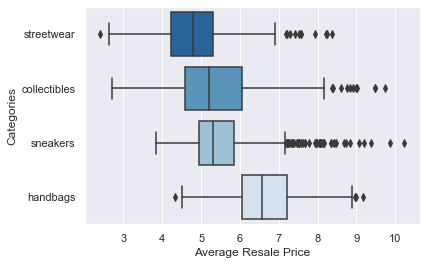

In [994]:
box_avgsp=sns.boxplot(x=np.log(df.avg_sales_price), y="category",data=df, palette="Blues_r")
box_avgsp.set_xlabel('Average Resale Price')
box_avgsp.set_ylabel('Categories')


Text(0, 0.5, 'Categories')

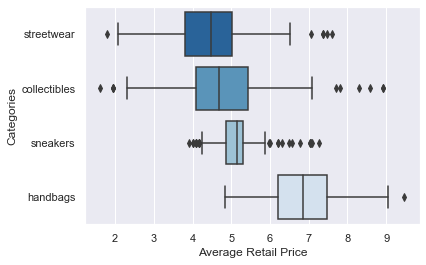

In [1008]:
box_avgrp=sns.boxplot(x=np.log(df.retail_price), y="category",data=df, palette="Blues_r")
box_avgrp.set_xlabel('Average Retail Price')
box_avgrp.set_ylabel('Categories')


Text(0, 0.5, 'Categories')

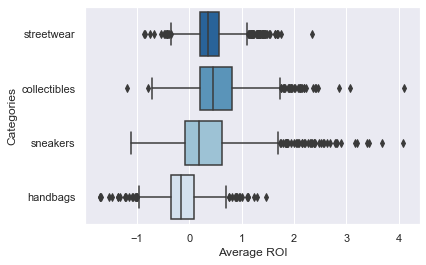

In [1009]:
box_avgroi=sns.boxplot(x=np.log(df.avg_ROI), y="category",data=df, palette="Blues_r")
box_avgroi.set_xlabel('Average ROI')
box_avgroi.set_ylabel('Categories')

Text(0, 0.5, 'Categories')

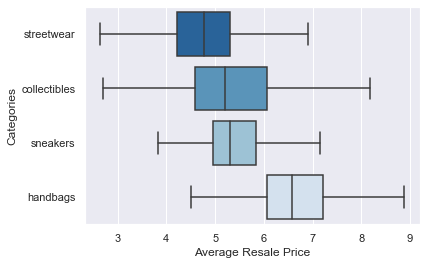

In [1007]:
box_avgsp_out=sns.boxplot(x=np.log(df.avg_sales_price), y="category",data=df, showfliers=False, palette="Blues_r")
box_avgsp_out.set_xlabel('Average Resale Price')
box_avgsp_out.set_ylabel('Categories')


Text(0, 0.5, 'Categories')

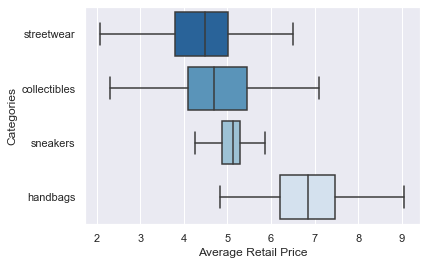

In [1002]:
box_avgrp_out=sns.boxplot(x=np.log(df.retail_price), y="category",data=df,showfliers=False, palette="Blues_r")
box_avgrp_out.set_xlabel('Average Retail Price')
box_avgrp_out.set_ylabel('Categories')


Text(0, 0.5, 'Categories')

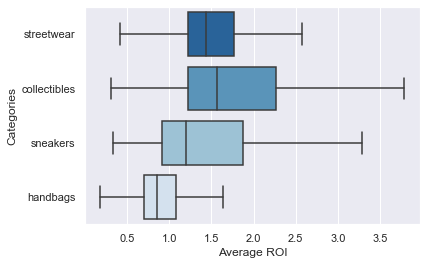

In [1006]:
box_avgroi_out=sns.boxplot(x=df.avg_ROI, y="category",data=df,showfliers=False, palette="Blues_r")
box_avgroi_out.set_xlabel('Average ROI')
box_avgroi_out.set_ylabel('Categories')

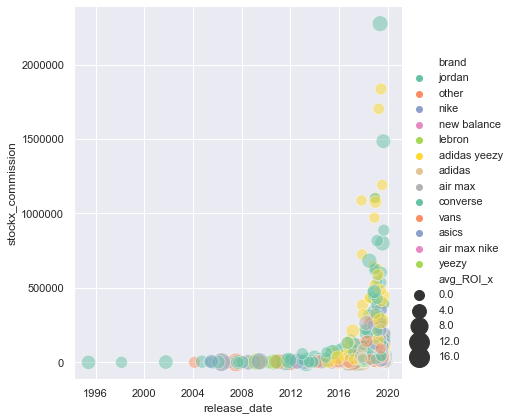

In [1188]:
rel_street=sns.relplot(x="release_date", y="stockx_commission", hue='brand', size="avg_ROI_x",
            sizes=(100, 400), alpha=.5, palette="Set2",
            height=6, data=sneakers_noout)
#rel_street.set_ylabel('StockX Comission')
#rel_street.set_xlabel('Release Date')

# stockx['avg_ROI']=stockx['avg_sales_price']/stockx['retail_price']
# stockx['year_price_spread']=stockx['year_high']-stockx['year_low']
# stockx['bid_ask_spread']=stockx['highest_bid']-stockx['lowest_ask']
# stockx['est_annual_sales']=stockx['annual_sales_quant']*stockx['avg_sales_price']
# stockx['stockx_commission']=stockx['est_annual_sales']*0.095
# stockx['stockx_commission_per_sale']=stockx['avg_sales_price']*0.095
# stockx['seller_net_profit_per_sale']=(stockx['avg_sales_price']-stockx['retail_price'])*(1-0.095-0.03)
# stockx['seller_net_profit']=stockx['annual_sales_quant']*stockx['seller_net_profit_per_sale']

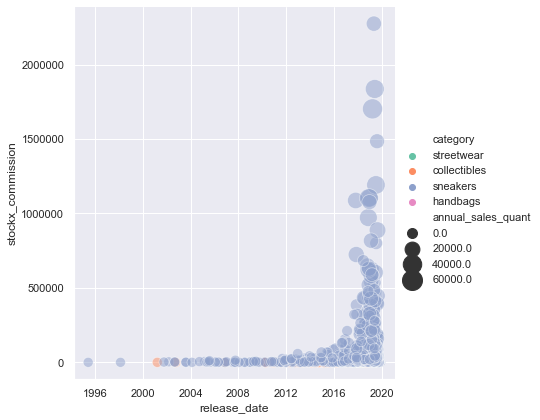

In [1171]:
rel_street=sns.relplot(x="release_date", y="stockx_commission", hue='category', size="annual_sales_quant",
            sizes=(100, 400), alpha=.5, palette="Set2",
            height=6, data=df)
#rel_street.set_ylabel('StockX Comission')
#rel_street.set_xlabel('Release Date')

Text(0.5, 0, 'Average ROI')

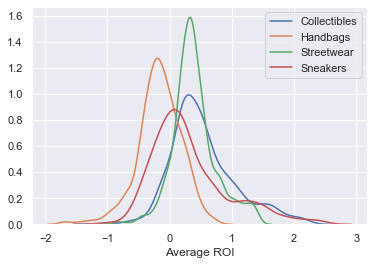

In [1079]:
k=sns.kdeplot(np.log(collectibles_noout.avg_ROI_x.dropna()),label='Collectibles')
k=sns.kdeplot(np.log(handbags_noout.avg_ROI_x.dropna()),label='Handbags')
k=sns.kdeplot(np.log(streetwear_noout.avg_ROI_x.dropna()),label='Streetwear')
k=sns.kdeplot(np.log(sneakers_noout.avg_ROI_x.dropna()),label='Sneakers')
k.set_xlabel('Average ROI')

Text(0.5, 1.0, 'Collectibles')

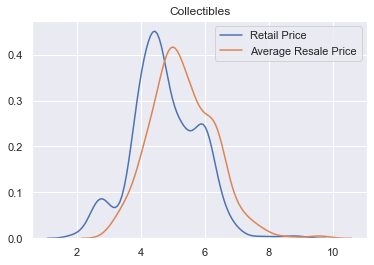

In [1071]:
#collectibles retails vs resale
k_collectibles = sns.kdeplot(np.log(collectibles_noout.retail_price.dropna()),label='Retail Price')
k_collectibles = sns.kdeplot(np.log(collectibles_noout.avg_sales_price.dropna()),label='Average Resale Price')
k_collectibles.set_title('Collectibles')

Text(0.5, 1.0, 'Handbags')

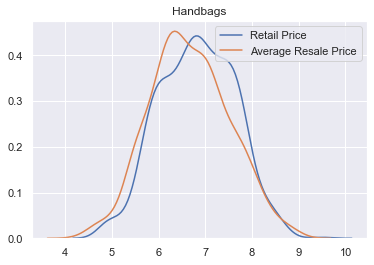

In [1076]:
#handbags retails vs resale
k_handbags=sns.kdeplot(np.log(handbags_noout.retail_price.dropna()),label='Retail Price')
k_handbags=sns.kdeplot(np.log(handbags_noout.avg_sales_price.dropna()),label='Average Resale Price')
k_handbags.set_title('Handbags')

Text(0.5, 1.0, 'Streetwear')

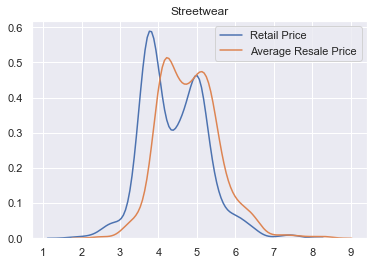

In [1074]:
#handbags streetwear retail vs resale 
k_streetwear=sns.kdeplot(np.log(streetwear_noout.retail_price.dropna()),label='Retail Price')
k_streetwear=sns.kdeplot(np.log(streetwear_noout.avg_sales_price.dropna()),label='Average Resale Price')
k_streetwear.set_title('Streetwear')

Text(0.5, 1.0, 'Sneakers')

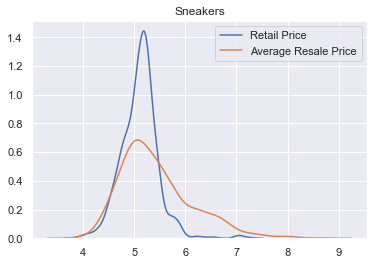

In [1075]:
#sneakers retails vs resale
k_sneakers=sns.kdeplot(np.log(sneakers_noout.retail_price.dropna()),label='Retail Price')
k_sneakers=sns.kdeplot(np.log(sneakers_noout.avg_sales_price.dropna()),label='Average Resale Price')
k_sneakers.set_title('Sneakers')

In [1058]:
#drop outliers outside of 3 STDs - sneakers 
sneakers_noout = sneakers[['avg_ROI']].dropna()
sneakers_noout = sneakers_noout.loc[sneakers_noout.apply(lambda x: np.abs(x - x.mean()) / x.std() < 3).all(axis=1)]
sneakers_noout = pd.merge(sneakers_noout, sneakers, how='left', left_index=True, right_index=True)
sneakers_noout

,avg_ROI_x,annual_sales_quant,avg_sales_price,category,color,condition,description,highest_bid,lowest_ask,product_title,...,bid_ask_spread,est_annual_sales,stockx_commission,stockx_commission_per_sale,seller_net_profit_per_sale,seller_net_profit,release_date_mut,release_year,product_title_lower,brand
1913,0.941667,777.0,113.0,sneakers,Black/Field Purple-White-Gym Red-Rush Blue-Am...,New,NaN,122.0,95.0,Jordan 1 Mid Lakers Top 3,...,27.0,87801.0,8341.095,10.735,-6.125,-4759.125,19,19,jordan 1 mid lakers top 3,jordan
1914,0.654545,690.0,108.0,sneakers,Camo Green/Total Orange-Gum Light Brown,New,Carhartt bringing a whole new fiery twist to t...,78.0,95.0,Air Force 1 Low Utility Carhartt WIP Camo,...,-17.0,74520.0,7079.400,10.260,-49.875,-34413.750,18,18,air force 1 low utility carhartt wip camo,other
1915,10.473333,6.0,3142.0,sneakers,Midnight Navy/Black-White,New,NaN,4650.0,3000.0,Jordan 1 Retro High OG Spike Lee Fort Greene,...,1650.0,18852.0,1790.940,298.490,2486.750,14920.500,17,17,jordan 1 retro high og spike lee fort greene,jordan
1916,1.066667,611.0,96.0,sneakers,White/Black-Gym Red,New,NaN,94.0,85.0,Jordan 1 Mid White Black Gym Red (GS),...,9.0,58656.0,5572.320,9.120,5.250,3207.750,NaN,NaN,jordan 1 mid white black gym red (gs),jordan
1917,0.881818,420.0,97.0,sneakers,White/White-White,New,NaN,150.0,89.0,Jordan 1 Mid Triple White (2019),...,61.0,40740.0,3870.300,9.215,-11.375,-4777.500,19,19,jordan 1 mid triple white (2019),jordan
1918,1.350000,6067.0,135.0,sneakers,Black/Starfish-Starfish-White,New,NaN,130.0,91.0,Jordan 1 Mid Shattered Backboard (GS),...,39.0,819045.0,77809.275,12.825,30.625,185801.875,19,19,jordan 1 mid shattered backboard (gs),jordan
1919,2.542857,690.0,356.0,sneakers,Summit White/White-Wolf Grey-Black,New,NaN,438.0,228.0,Nike Blazer Mid Sacai White Grey,...,210.0,245640.0,23335.800,33.820,189.000,130410.000,19,19,nike blazer mid sacai white grey,nike
1920,0.756522,759.0,174.0,sneakers,Hyper Crimson/Black,New,Become a pro at the sneaker game and cop the A...,160.0,150.0,Air Foamposite Pro Color Shift,...,10.0,132066.0,12546.270,16.530,-49.000,-37191.000,19,19,air foamposite pro color shift,other
1921,2.671429,800.0,374.0,sneakers,Black/White-Wolf Grey-Black,New,NaN,469.0,235.0,Nike Blazer Mid sacai Black Grey,...,234.0,299200.0,28424.000,35.530,204.750,163800.000,19,19,nike blazer mid sacai black grey,nike
1923,1.600000,9258.0,192.0,sneakers,Black/Gym Red-White-Sail,New,NaN,282.0,161.0,Jordan 1 Retro High Black Gym Red (GS),...,121.0,1777536.0,168865.920,18.240,63.000,583254.000,19,19,jordan 1 retro high black gym red (gs),jordan


In [1059]:
#drop outliers outside of 3 STDs - collectibles 
collectibles_noout = collectibles[['avg_ROI']].dropna()
collectibles_noout = collectibles_noout.loc[collectibles_noout.apply(lambda x: np.abs(x - x.mean()) / x.std() < 3).all(axis=1)]
collectibles_noout = pd.merge(collectibles_noout, collectibles, how='left', left_index=True, right_index=True)
collectibles_noout

,avg_ROI_x,annual_sales_quant,avg_sales_price,category,color,condition,description,highest_bid,lowest_ask,product_title,...,avg_ROI_y,year_price_spread,bid_ask_spread,est_annual_sales,stockx_commission,stockx_commission_per_sale,seller_net_profit_per_sale,seller_net_profit,release_date_mut,release_year
23,2.459016,1.0,150.0,collectibles,NaN,New,NaN,100.0,NaN,Bearbrick Godzilla 400% Green,...,2.459016,0.0,NaN,150.0,14.250,14.250,77.875,77.875,NaN,NaN
25,1.250000,1.0,125.0,collectibles,NaN,New,NaN,NaN,150.0,"All Gone 2017 ""Cuban Linx"" Book Black",...,1.250000,0.0,NaN,125.0,11.875,11.875,21.875,21.875,NaN,NaN
53,1.250000,1.0,100.0,collectibles,NaN,New,NaN,100.0,NaN,Bearbrick Superman 400% Navy/Red,...,1.250000,0.0,NaN,100.0,9.500,9.500,17.500,17.500,NaN,NaN
54,4.470588,1.0,380.0,collectibles,NaN,New,NaN,300.0,NaN,Bearbrick x mastermind Black and Gold 100% & 4...,...,4.470588,0.0,NaN,380.0,36.100,36.100,258.125,258.125,13,13
55,0.916667,1.0,550.0,collectibles,NaN,New,NaN,600.0,NaN,Takashi Murakami Flower 1M Plush Pink,...,0.916667,0.0,NaN,550.0,52.250,52.250,-43.750,-43.750,NaN,NaN
57,0.905660,1.0,48.0,collectibles,NaN,New,NaN,NaN,60.0,Palace Chewy Pro-S 8.375 Skateboard Deck Multi,...,0.905660,0.0,NaN,48.0,4.560,4.560,-4.375,-4.375,17,17
58,1.612903,1.0,200.0,collectibles,NaN,New,"Due to the characteristics of the product, fin...",110.0,250.0,Bearbrick JSB 100% & 400% Set Chrome,...,1.612903,0.0,-140.0,200.0,19.000,19.000,66.500,66.500,NaN,NaN
60,3.036530,1.0,1330.0,collectibles,NaN,New,NaN,902.0,3500.0,Bearbrick x Daft Punk Random Access Memories V...,...,3.036530,0.0,-2598.0,1330.0,126.350,126.350,780.500,780.500,NaN,NaN
61,2.488889,1.0,560.0,collectibles,NaN,New,NaN,275.0,NaN,Steven Harrington Gotcha Figure Neon Green,...,2.488889,0.0,NaN,560.0,53.200,53.200,293.125,293.125,18,18
62,3.000000,1.0,150.0,collectibles,NaN,New,NaN,70.0,NaN,Bearbrick Nyabrick Beckoning Cat 400% Black,...,3.000000,0.0,NaN,150.0,14.250,14.250,87.500,87.500,NaN,NaN


In [1053]:
#drop outliers outside of 3 STDs - handbags 
handbags_noout = handbags[['avg_ROI']].dropna()
handbags_noout = handbags_noout.loc[handbags_noout.apply(lambda x: np.abs(x - x.mean()) / x.std() < 3).all(axis=1)]
handbags_noout = pd.merge(handbags_noout, handbags, how='left', left_index=True, right_index=True)

In [1056]:
#drop outliers outside of 3 STDs - streetwear 
streetwear_noout = streetwear[['avg_ROI']].dropna()
streetwear_noout = streetwear_noout.loc[streetwear_noout.apply(lambda x: np.abs(x - x.mean()) / x.std() < 3).all(axis=1)]
streetwear_noout = pd.merge(streetwear_noout, streetwear, how='left', left_index=True, right_index=True)

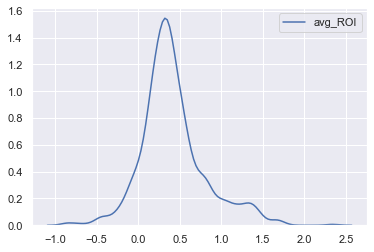

In [984]:
sns.kdeplot(np.log(streetwear.avg_ROI.dropna()))

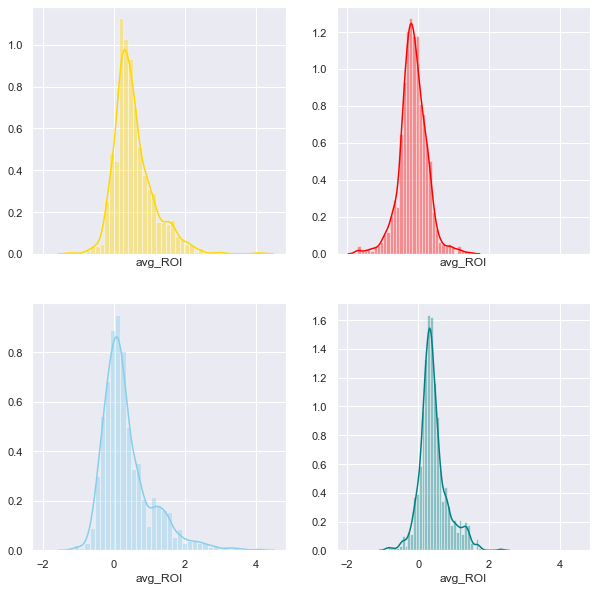

In [1022]:
import matplotlib.pyplot as plt
f, axes = plt.subplots(2, 2, figsize=(10, 10), sharex=True)
sns.distplot(np.log(collectibles.avg_ROI.dropna()),color='gold',norm_hist=True,ax=axes[0, 0],)
sns.distplot(np.log(handbags.avg_ROI.dropna()),color='red',norm_hist=True,ax=axes[0, 1])
sns.distplot(np.log(sneakers.avg_ROI.dropna()),color='skyblue',norm_hist=True,ax=axes[1, 0])
sns.distplot(np.log(streetwear.avg_ROI.dropna()),color='teal',norm_hist=True,ax=axes[1, 1])



# f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)
# sns.distplot( df["sepal_length"] , color="skyblue", ax=axes[0, 0])
# sns.distplot( df["sepal_width"] , color="olive", ax=axes[0, 1])
# sns.distplot( df["petal_length"] , color="gold", ax=axes[1, 0])
# sns.distplot( df["petal_width"] , color="teal", ax=axes[1, 1])


In [957]:
colFun = {'annual_sales_quant':['count'],
          'avg_sales_price': ['mean','std'], 
          'retail_price': ['mean','std'],
          'avg_ROI':['mean','std'],
          'seller_net_profit_per_sale':['mean','std'],
          }

test5=sneakers.groupby('brand').agg(colFun)
test5.style.applymap(color_negative_red).format('{0:,.2f}').set_table_styles([{'selector': 'tr:nth-of-type(odd)',
  'props': [('background', '#eee')]}, 
 {'selector': 'tr:nth-of-type(even)',
  'props': [('background', 'white')]},
 {'selector': 'th',
  'props': [('background', '#245ab3'), 
            ('color', 'white'),
            ('font-family', 'verdana')]},
 {'selector': 'td',
  'props': [('font-family', 'verdana')]},
])

Text(0, 0.5, 'Brands')

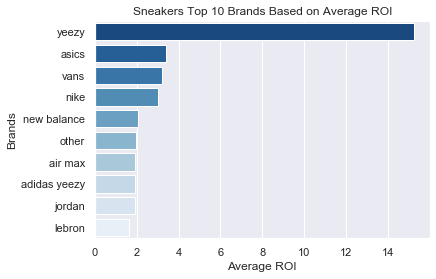

In [1083]:
#top 10 ROI sneaker brands 
test6=sneakers.groupby('brand').agg(['mean'])[['avg_ROI']].reset_index()
test6.columns = test6.columns.get_level_values(0)

sneaker_brands= sns.barplot(y="brand", x="avg_ROI", data=test6.sort_values('avg_ROI',ascending=False).head(10),palette="Blues_r")
sneaker_brands.set_title('Sneakers Top 10 Brands Based on Average ROI')
sneaker_brands.set_xlabel('Average ROI')
sneaker_brands.set_ylabel('Brands')

Text(0, 0.5, 'Brands')

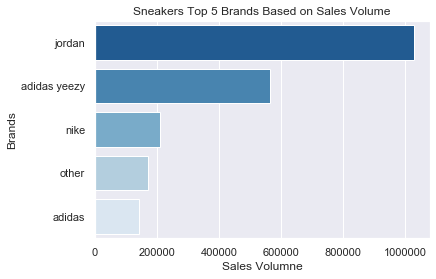

In [1111]:
#top 10 Sales Quantity brands 
test7=sneakers.groupby('brand').agg(['sum'])[['annual_sales_quant']].reset_index()
test7.columns = test7.columns.get_level_values(0)

sneaker_brands= sns.barplot(y="brand", x="annual_sales_quant", data=test7.sort_values('annual_sales_quant',ascending=False).head(5),palette="Blues_r")
sneaker_brands.set_title('Sneakers Top 5 Brands Based on Sales Volume')
sneaker_brands.set_xlabel('Sales Volumne')
sneaker_brands.set_ylabel('Brands')

Text(0, 0.5, 'Average ROI')

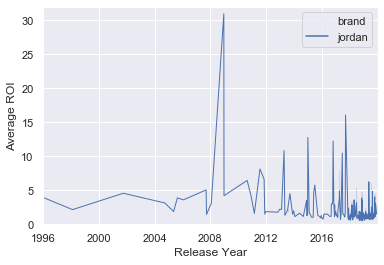

In [1112]:
Jordan=sns.lineplot(x="release_date", y=('avg_ROI'),hue='brand',markers=True, data=sneakers.loc[sneakers.brand=='jordan'], color='navy',linewidth=1)
Jordan.axes.set_xlim([datetime.date(1996, 1, 1), datetime.date(2019, 12, 31)])
Jordan.axes.set_ylim(0,32)
Jordan.set_xlabel('Release Year')
Jordan.set_ylabel('Average ROI')
#Jordan.set_title('Relase Date')

Text(0, 0.5, 'Average ROI')

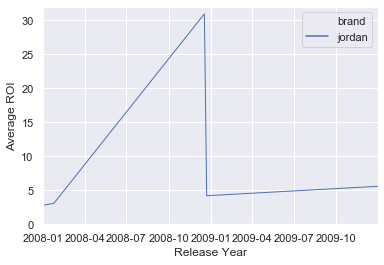

In [1113]:
Jordan=sns.lineplot(x="release_date", y=('avg_ROI'),hue='brand',markers=True, data=sneakers.loc[sneakers.brand=='jordan'], color='navy',linewidth=1)
Jordan.axes.set_xlim([datetime.date(2008, 1, 1), datetime.date(2009, 12, 31)])
Jordan.axes.set_ylim(0,32)
Jordan.set_xlabel('Release Year')
Jordan.set_ylabel('Average ROI')
#Jordan.set_title('Relase Date')

Text(0, 0.5, 'Average ROI')

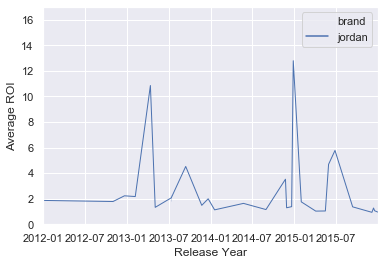

In [1116]:
Jordan=sns.lineplot(x="release_date", y=('avg_ROI'),hue='brand',markers=True, data=sneakers.loc[sneakers.brand=='jordan'],color='navy',linewidth=1)
Jordan.axes.set_xlim([datetime.date(2012, 1, 1), datetime.date(2015, 12, 31)])
Jordan.axes.set_ylim(0,17)
Jordan.set_xlabel('Release Year')
Jordan.set_ylabel('Average ROI')
#Jordan.set_title('Relase Date')

Text(0, 0.5, 'Average ROI')

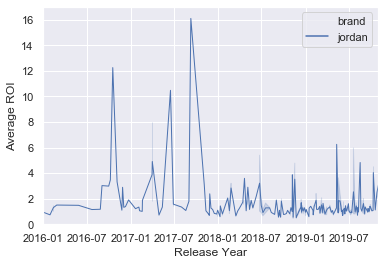

In [1115]:
Jordan=sns.lineplot(x="release_date", y=('avg_ROI'),hue='brand',markers=True, data=sneakers.loc[sneakers.brand=='jordan'],color='navy',linewidth=1)
Jordan.axes.set_xlim([datetime.date(2016, 1, 1), datetime.date(2019, 10, 30)])
Jordan.axes.set_ylim(0,17)
Jordan.set_xlabel('Release Year')
Jordan.set_ylabel('Average ROI')
#Jordan.set_title('Relase Date')

Text(0, 0.5, 'Average ROI')

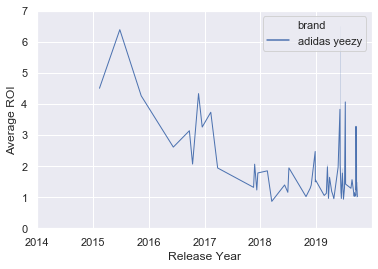

In [1132]:
jeezy=sns.lineplot(x="release_date", y=('avg_ROI'),hue='brand',markers=True, data=sneakers.loc[sneakers.brand=='adidas yeezy'], color='navy',linewidth=1)
jeezy.axes.set_xlim([datetime.date(2014, 1, 1), datetime.date(2019, 12, 31)])
jeezy.axes.set_ylim(0,7)
jeezy.set_xlabel('Release Year')
jeezy.set_ylabel('Average ROI')

Text(0, 0.5, 'Average ROI')

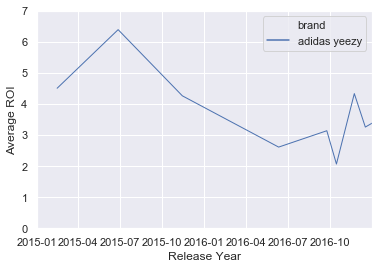

In [1134]:
jeezy=sns.lineplot(x="release_date", y=('avg_ROI'),hue='brand',markers=True, data=sneakers.loc[sneakers.brand=='adidas yeezy'], color='navy',linewidth=1)
jeezy.axes.set_xlim([datetime.date(2015, 1, 1), datetime.date(2016, 12, 31)])
jeezy.axes.set_ylim(0,7)
jeezy.set_xlabel('Release Year')
jeezy.set_ylabel('Average ROI')

Text(0, 0.5, 'Average ROI')

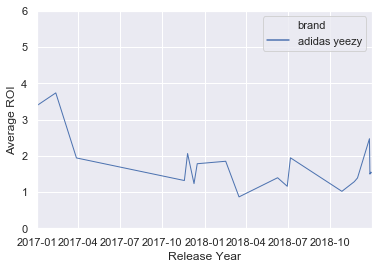

In [1151]:
jeezy=sns.lineplot(x="release_date", y=('avg_ROI'),hue='brand',markers=True, data=sneakers.loc[sneakers.brand=='adidas yeezy'], color='navy',linewidth=1)
jeezy.axes.set_xlim([datetime.date(2017, 1, 1), datetime.date(2018, 12, 31)])
jeezy.axes.set_ylim(0,6)
jeezy.set_xlabel('Release Year')
jeezy.set_ylabel('Average ROI')

Text(0, 0.5, 'Average ROI')

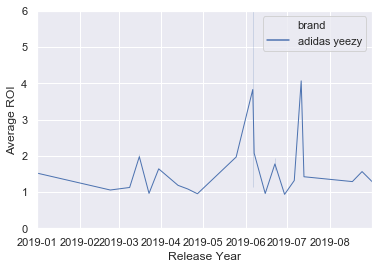

In [1150]:
jeezy=sns.lineplot(x="release_date", y=('avg_ROI'),hue='brand', data=sneakers.loc[sneakers.brand=='adidas yeezy'], color='navy',linewidth=1)
jeezy.axes.set_xlim([datetime.date(2019, 1, 1), datetime.date(2019, 8, 31)])
jeezy.axes.set_ylim(0,6)
jeezy.set_xlabel('Release Year')
jeezy.set_ylabel('Average ROI')